# Output sensor result

In [83]:
import os
import pandas as pd
import re

def extract_parts(filename):
    match = re.match(r'(Diz|Val)_(\d+)_T(\d+)', filename)
    if match:
        prefix = match.group(1)
        part1 = int(match.group(2))
        part2 = int(match.group(3))
        # Use a sorting key that puts "Diz" (which is 0) before "Val" (which is 1)
        prefix_order = 0 if prefix == "Diz" else 1
        return (prefix_order, part1, part2)
    return (float('inf'), float('inf'), float('inf'))  # Unmatched files last

In [84]:
import os
import pandas as pd

# Specify the folder path
folder_path = r"C:\Users\shuyu.liu\OneDrive - University of Florida\Documents\GitHub\GaitValidation\sensor data\SENSOR REPORT"     # Change this to the folder's path

# List all files in the specified folder
files = os.listdir(folder_path)
files.sort(key=extract_parts)


#features 
avg_stance_time_left_list = []
avg_stance_time_right_list = []
avg_swing_time_left_list = []
avg_swing_time_right_list = []
avg_step_time_left_list = []
avg_step_time_right_list = []
avg_step_length_left_list = []
avg_step_length_right_list = []

avg_stance_time_list = []
avg_swing_time_list = []
avg_double_time_list = []
avg_step_time_list = []
cadence_list = []
avg_velocity_list = []
avg_step_length_list = []

trial_names = []



for file_name in files: 
    
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_csv(file_path)

################ algorithm 
    stance_time_left = df['Stride Time [ms]']* df['Stance Phase left [%]']/10**5
    stance_time_right = df['Stride Time [ms]']* df['Stance Phase right [%]']/10**5
    swing_time_left = df['Stride Time [ms]']* df['Swing Phase left [%]']/10**5
    swing_time_right = df['Stride Time [ms]']* df['Swing Phase right [%]']/10**5
    step_time_left = df['Step Time left [ms]']/10**3
    step_time_right = df['Step Time right [ms]']/10**3
    step_length_left = df['Step Length left [cm]']/10**2
    step_length_right = df['Step Length right [cm]']/10**2

    stance_time = (stance_time_left + stance_time_right) / 2
    swing_time = (swing_time_left + swing_time_right)/2
    double_time =  df['Stride Time [ms]']* df['Double Stance [%]']/10**5  
    cadence = df['Cadence [step/min]'] 
    step_length = (step_length_left + step_length_right)/2
    step_time = (step_time_left + step_time_right)/2
    # Check for which velocity column exists and convert to m/s
    if 'Velocity [km/h]' in df.columns:
        velocity = df['Velocity [km/h]'] / 3.6  # Convert from km/h to m/s
    elif 'Velocity [mph]' in df.columns:
        velocity = df['Velocity [mph]'] * 0.44704  # Convert from mph to m/s    


################ append 
    avg_stance_time_left_list.append(stance_time_left)
    avg_stance_time_right_list.append(stance_time_right)
    avg_swing_time_left_list.append(swing_time_left)
    avg_swing_time_right_list.append(swing_time_right)
    avg_stance_time_list.append(stance_time)
    avg_step_time_left_list.append(step_time_left)
    avg_step_time_right_list.append(step_time_right)
    avg_step_length_left_list.append(step_length_left)
    avg_step_length_right_list.append(step_length_right)

    
    avg_swing_time_list.append(swing_time)
    avg_double_time_list.append(double_time)
    cadence_list.append(cadence)
    avg_velocity_list.append(velocity)    
    avg_step_length_list.append(step_length)
    avg_step_time_list.append(step_time)
    trial_names.append(file_name)

    
gaitcycletime_dict = {
'trial name': trial_names,
'avg_stancetime': avg_stance_time_list,
'avg_swingtime': avg_swing_time_list,
'avg_doublesupporttime': avg_double_time_list,
'avg_steptime': avg_step_time_list,
'avg_steplength': avg_step_length_list,
'avg_velocity': avg_velocity_list,
'avg_cadence': cadence_list, 
'avg_stancetime_left': avg_stance_time_left_list,
'avg_stancetime_right': avg_stance_time_right_list,
'avg_swingtime_left': avg_swing_time_left_list,
'avg_swingtime_right': avg_swing_time_right_list,
'avg_steptime_left': avg_step_time_left_list,
'avg_steptime_right': avg_step_time_right_list, 
'avg_steplength_left': avg_step_length_left_list, 
'avg_steplength_right': avg_step_length_right_list, 
}

# Initialize an empty dictionary to store the flattened sensor data
sensor_cycletime_dict = {}

# Loop over your variables and extract the values
for variable in gaitcycletime_dict:
    if variable == "trial name":
        # If variable is trial names, copy as-is (no iloc needed)
        sensor_cycletime_dict[variable] = gaitcycletime_dict[variable]
    else:
        # Otherwise, assume it's a list of Series — take first value
        sensor_cycletime_dict[variable] = [s.iloc[0] for s in gaitcycletime_dict[variable]]


# Convert to DataFrame
df_results_sensor_dict = pd.DataFrame(sensor_cycletime_dict)

# Save to Excel
df_results_sensor_dict.to_excel(r"C:\Users\shuyu.liu\OneDrive - University of Florida\Documents\GitHub\GaitValidation\sensor result", index=False)

print("Excel file 'gait_analysis_results_sensor.xlsx' has been saved successfully.")

Excel file 'gait_analysis_results_sensor.xlsx' has been saved successfully.


# Generate correlation

In [44]:
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt

# save_path = r"C:\Users\shuyu.liu\OneDrive - University of Florida\Desktop\OAKS DATA\Results"

def corri(feature, left_video, right_video, left_sensor, right_sensor):
    
    # Now combine the left and right stance arrays into the combined arrays
    combined_video = np.concatenate([left_video, right_video])
    combined_sensor = np.concatenate([left_sensor, right_sensor])
    
    # Calculate Pearson's correlation coefficient
    corr_coefficient, _ = pearsonr(combined_video, combined_sensor)
    
    print(f"Pearson correlation coefficient: {corr_coefficient}")
    
    # Create the scatter plot with different colors for left and right
    plt.scatter(left_sensor, left_video, color='blue', label='Left', alpha=0.5)
    plt.scatter(right_sensor, right_video, color='red', label='Right', alpha=0.5)
    # Compute the overall MIN and MAX correctly
    MIN = min(left_sensor.min(), right_sensor.min(), left_video.min(), right_video.min()) * 0.9
    MAX = max(left_sensor.max(), right_sensor.max(), left_video.max(), right_video.max()) * 1.1
    plt.plot([MIN, MAX], [MIN, MAX], color='red', linestyle='--', label="x = y")
    
    # Labeling the plot
    plt.title(f"Scatter Plot of video vs sensor \nPearson Correlation in {feature}: {corr_coefficient:.2f}")
    plt.xlabel('Sensor')
    plt.ylabel('Video')
    
    plt.xlim(MIN, MAX)
    plt.ylim(MIN, MAX)
    
    # Add a legend
    plt.legend()

    # if save_path:
    #     filename = f"{feature}_correlation_plot.png"
    #     full_path = os.path.join(save_path, filename)
    #     plt.savefig(full_path, dpi=300)
    #     print(f"Figure saved to: {full_path}")
            
    # Show the plot
    plt.show()


def corrisingle(feature, video, sensor):

    # Calculate Pearson's correlation coefficient
    corr_coefficient, _ = pearsonr(video, sensor)
    
    print(f"Pearson correlation coefficient: {corr_coefficient}")
    
    # Create the scatter plot with different colors for left and right
    plt.scatter(sensor, video, color='blue', alpha=0.5)
    # Compute the overall MIN and MAX correctly
    MIN = min(sensor.min(), video.min()) * 0.9
    MAX = max(sensor.max(), video.max()) * 1.1
    plt.plot([MIN, MAX], [MIN, MAX], color='red', linestyle='--', label="x = y")
    
    
    # Labeling the plot
    plt.title(f"Scatter Plot of video vs sensor \nPearson Correlation in {feature}_combined: {corr_coefficient:.2f}")
    plt.xlabel('Sensor')
    plt.ylabel('Video')
    
    plt.xlim(MIN, MAX)
    plt.ylim(MIN, MAX)
    
    # Add a legend
    plt.legend()

    # if save_path:
    #     filename = f"{feature}_combined_correlation_plot.png"
    #     full_path = os.path.join(save_path, filename)
    #     plt.savefig(full_path, dpi=300)
    #     print(f"Figure saved to: {full_path}")
            
    # Show the plot
    plt.show()

In [97]:
import pandas as pd

# Read the first Excel file
df_sensor = pd.read_excel(r"C:\Users\shuyu.liu\OneDrive - University of Florida\Desktop\OAKS DATA\Results\large model\gait_analysis_results_sensor.xlsx")

# Read the second Excel file
df_avg = pd.read_excel(r"C:\Users\shuyu.liu\OneDrive - University of Florida\Desktop\OAKS DATA\Results\large model\gait_analysis_results_video.xlsx")

leftright_columns_of_interest = [
    'avg_stancetime_left',
    'avg_stancetime_right',
    'avg_swingtime_left',
    'avg_swingtime_right',
    'avg_steptime_left',
    'avg_steptime_right',
    'avg_steplength_left',
    'avg_steplength_right'
]

combined_columns_of_interest = ['avg_stancetime', 'avg_swingtime', 'avg_doublesupporttime', 'avg_steptime',
       'avg_steplength', 'avg_velocity', 'avg_cadence']

leftright_column_indexes = [df_sensor.columns.get_loc(col) for col in leftright_columns_of_interest][0::2]
combined_column_indexes = [df_sensor.columns.get_loc(col) for col in combined_columns_of_interest]


### find specific files
# for large model to remove below files
# sensorproblem
indices_sensorproblem = df_sensor['avg_steplength_left'][df_sensor['avg_steplength_left'] > 1].index.tolist()  ## VAL005

# fastwalker 
condition = (df_avg['avg_doublesupporttime'] > 0.255) & (df_sensor['avg_doublesupporttime'] < 0.195)
fastwalker_indices = df_avg['avg_doublesupporttime'][condition].index.tolist()   ## some trials of VAL007 and VAL013, and val024

# extra files to remove for small model 
# outlier for small model 
condition = (df_avg['avg_stancetime_left'] < 0.3)
outlier_small = df_avg['avg_stancetime_left'][condition].index.tolist() 

Pearson correlation coefficient: 0.9320866852062527
Figure saved to: C:\Users\shuyu.liu\OneDrive - University of Florida\Desktop\OAKS DATA\Results\stancetime_correlation_plot.png


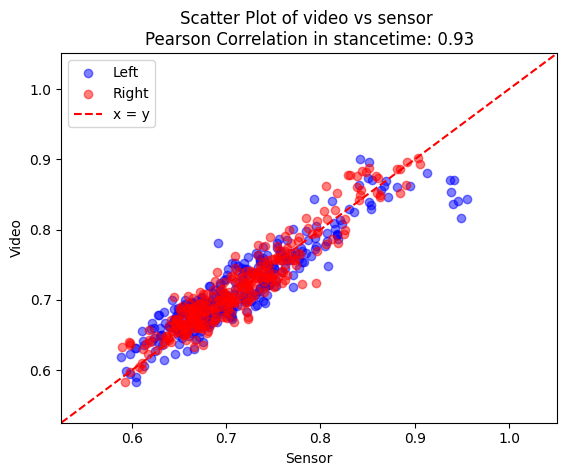

Pearson correlation coefficient: 0.7467674740009791
Figure saved to: C:\Users\shuyu.liu\OneDrive - University of Florida\Desktop\OAKS DATA\Results\swingtime_correlation_plot.png


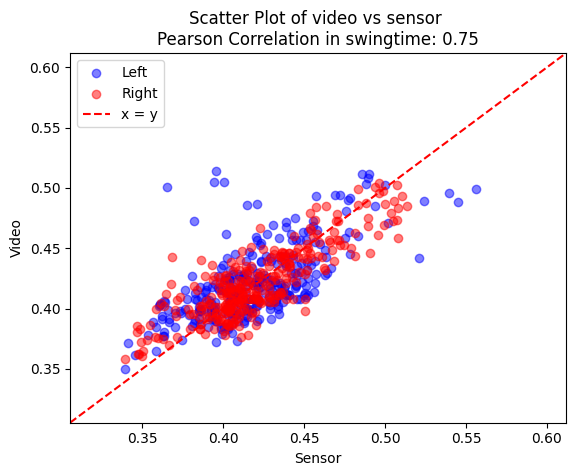

Pearson correlation coefficient: 0.8877796506808752
Figure saved to: C:\Users\shuyu.liu\OneDrive - University of Florida\Desktop\OAKS DATA\Results\steptime_correlation_plot.png


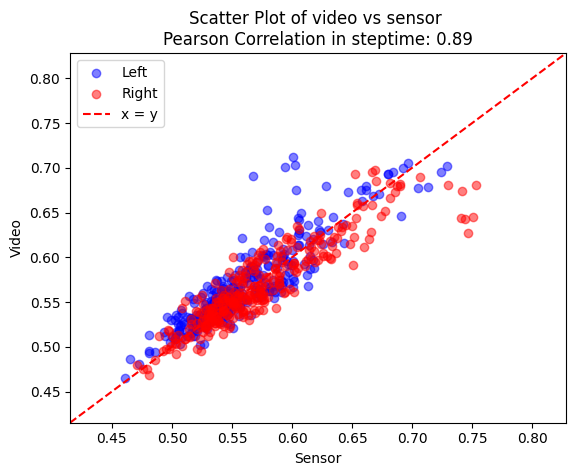

Pearson correlation coefficient: 0.5655186012304428
Figure saved to: C:\Users\shuyu.liu\OneDrive - University of Florida\Desktop\OAKS DATA\Results\steplength_correlation_plot.png


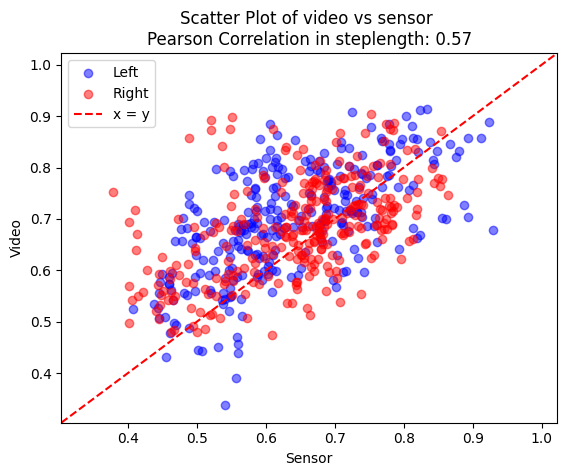

In [78]:
indices = leftright_column_indexes  # Specific indices

# # Define indices to remove
# large model outlier
indices_to_remove = set(ct_indices + indices_sensorproblem + fastwalker_indices) 
## small model outlier 
# indices_to_remove = set(ct_indices + indices_sensorproblem + fastwalker_indices + outlier_small) 
 


for i in indices:
    left_video = df_avg.iloc[:, i]  
    right_video = df_avg.iloc[:, i + 1]
    left_sensor = df_sensor.iloc[:, i]
    right_sensor = df_sensor.iloc[:, i + 1]
   
    # Remove specified indices from left_video, right_video, left_sensor, and right_sensor
    mask_left_video = ~left_video.index.isin(indices_to_remove)
    mask_right_video = ~right_video.index.isin(indices_to_remove)
    mask_left_sensor = ~left_sensor.index.isin(indices_to_remove)
    mask_right_sensor = ~right_sensor.index.isin(indices_to_remove)

    # Apply the mask to remove the specified indices
    filtered_left_video = left_video[mask_left_video]
    filtered_right_video = right_video[mask_right_video]
    filtered_left_sensor = left_sensor[mask_left_sensor]
    filtered_right_sensor = right_sensor[mask_right_sensor]
   
    feature = df_sensor.columns[i].split("_")[1]
    corri(feature, filtered_left_video, filtered_right_video, filtered_left_sensor, filtered_right_sensor)

Pearson correlation coefficient: 0.9668067856568191
Figure saved to: C:\Users\shuyu.liu\OneDrive - University of Florida\Desktop\OAKS DATA\Results\stancetime_combined_correlation_plot.png


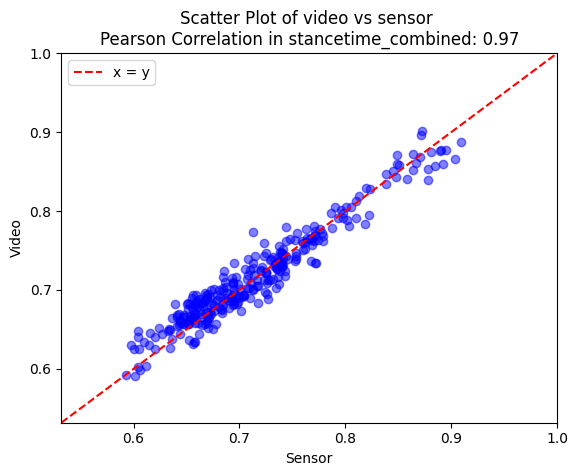

Pearson correlation coefficient: 0.8602501340543967
Figure saved to: C:\Users\shuyu.liu\OneDrive - University of Florida\Desktop\OAKS DATA\Results\swingtime_combined_correlation_plot.png


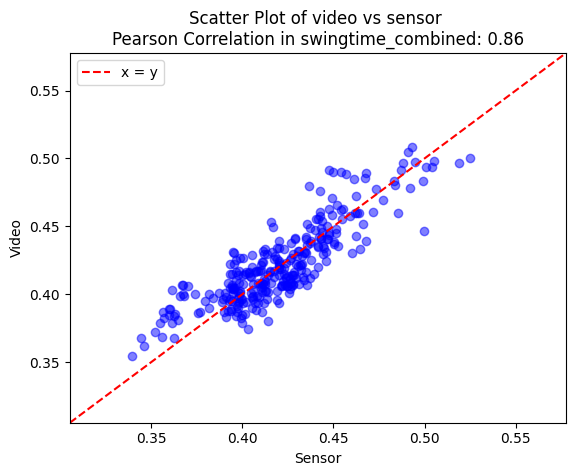

Pearson correlation coefficient: 0.7536929072678468
Figure saved to: C:\Users\shuyu.liu\OneDrive - University of Florida\Desktop\OAKS DATA\Results\doublesupporttime_combined_correlation_plot.png


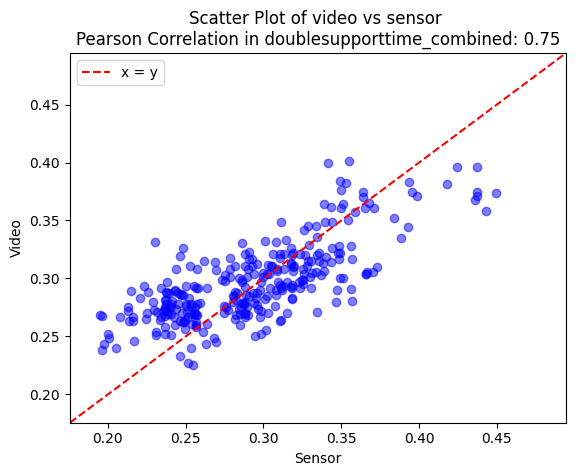

Pearson correlation coefficient: 0.9975107946235615
Figure saved to: C:\Users\shuyu.liu\OneDrive - University of Florida\Desktop\OAKS DATA\Results\steptime_combined_correlation_plot.png


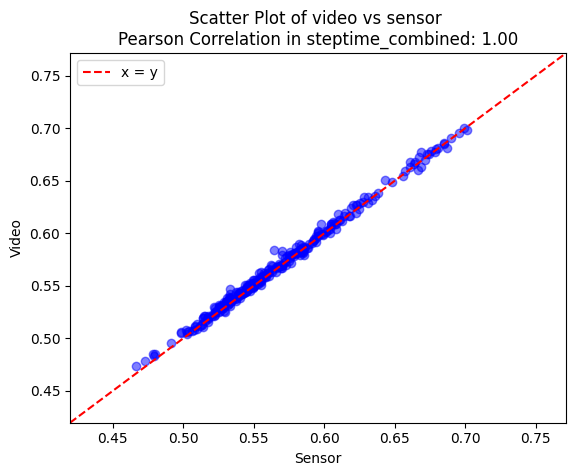

Pearson correlation coefficient: 0.8398827440815214
Figure saved to: C:\Users\shuyu.liu\OneDrive - University of Florida\Desktop\OAKS DATA\Results\steplength_combined_correlation_plot.png


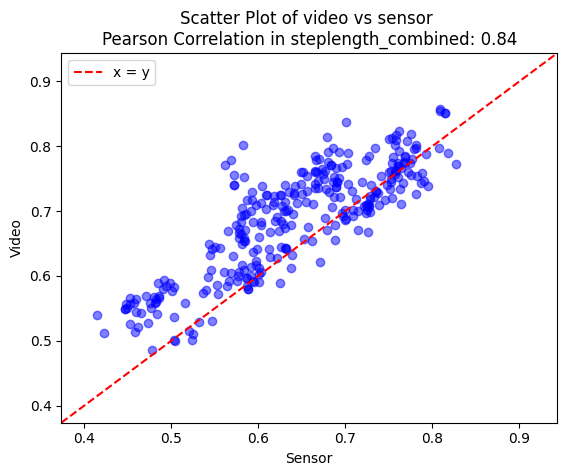

Pearson correlation coefficient: 0.8908749751876012
Figure saved to: C:\Users\shuyu.liu\OneDrive - University of Florida\Desktop\OAKS DATA\Results\velocity_combined_correlation_plot.png


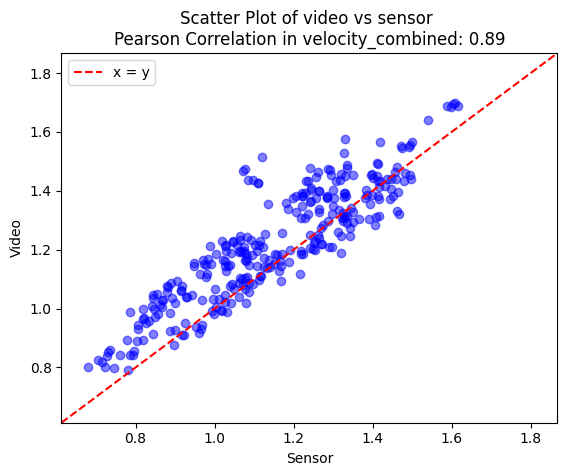

Pearson correlation coefficient: 0.9970417267243694
Figure saved to: C:\Users\shuyu.liu\OneDrive - University of Florida\Desktop\OAKS DATA\Results\cadence_combined_correlation_plot.png


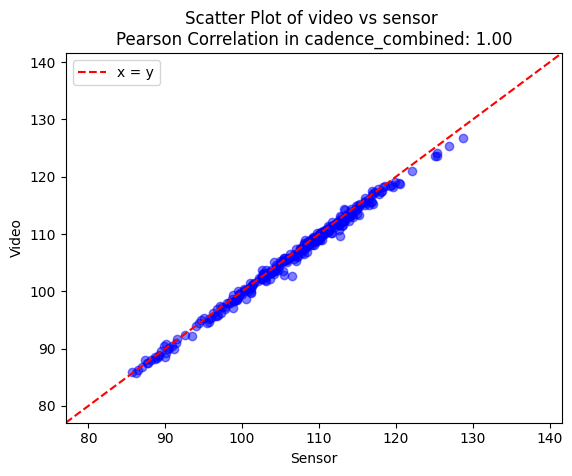

In [79]:
indices = combined_column_indexes # Specific indices

for i in indices:
    video = df_avg.iloc[:, i]  
    sensor = df_sensor.iloc[:, i]

    # Remove specified indices from left_video, right_video, left_sensor, and right_sensor
    mask_video = ~video.index.isin(indices_to_remove)
    mask_sensor = ~sensor.index.isin(indices_to_remove)
    
    # Apply the mask to remove the specified indices
    filtered_video = video[mask_video]
    filtered_sensor = sensor[mask_sensor]
    
    feature = df_sensor.columns[i].split("_")[1]
    corrisingle(feature, filtered_video, filtered_sensor)

# COMPARE DIFFERENCE 

In [ ]:
import statsmodels.formula.api as smf
import pandas as pd

dependent_vars = [
    "avg_stancetime", "avg_swingtime", "avg_doublesupporttime",
    "avg_steptime", "avg_steplength", "avg_velocity", "avg_cadence"
]

df = pd.read_excel(r"C:\Users\shuyu.liu\OneDrive - University of Florida\Documents\GitHub\GaitValidation\LLM analysis\large model", sheet_name="Sheet1")
# Ensure 'group' and 'sex' are treated as categorical variables
df['Group'] = df['Group'].astype('category')
df['Gender'] = df['Gender'].astype('category')  # Assuming 'sex' is coded like 'Male'/'Female'
# df['AGE_GROUP'] = df['AGE_GROUP'].astype('category')  # Assuming 'age_group' is coded like 'Young'/'Old'
df = df.dropna(subset=['Age'])

# Fit the linear mixed model
for var in dependent_vars:
# variable = dependent_vars[0]  # Change this to the desired dependent variable
    model = smf.mixedlm(f"{var} ~  Group + Age + Gender", data=df, groups=df["ID"])
    result = model.fit()

    # Show the summary
    print(result.summary())